In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Project Dataset\price of a Football player.csv")
df.head(2)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0


In [5]:
df['market_value'] = df.pop('market_value')

In [6]:
df.head(2)

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,market_value
0,Alexis Sanchez,Arsenal,28,LW,1,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0,65.0
1,Mesut Ozil,Arsenal,28,AM,1,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0,50.0


In [7]:
# null values

print(df.isnull().sum())

name            0
club            0
age             0
position        0
position_cat    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
market_value    0
dtype: int64


In [8]:
# to check the ifo of every columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   page_views    461 non-null    int64  
 6   fpl_value     461 non-null    float64
 7   fpl_sel       461 non-null    object 
 8   fpl_points    461 non-null    int64  
 9   region        460 non-null    float64
 10  nationality   461 non-null    object 
 11  new_foreign   461 non-null    int64  
 12  age_cat       461 non-null    int64  
 13  club_id       461 non-null    int64  
 14  big_club      461 non-null    int64  
 15  new_signing   461 non-null    int64  
 16  market_value  461 non-null    float64
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [9]:
# to check the statistic details
df.describe()

,age,position_cat,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,market_value
count,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336,11.012039
std,3.961892,1.000061,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822,12.257403
min,17.000000,1.000000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.050000
25%,24.000000,1.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000,3.000000
50%,27.000000,2.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000,7.000000
75%,30.000000,3.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000,15.000000
max,38.000000,4.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000,75.000000


In [10]:
q1 = df['page_views'].quantile(0.25)
q3 = df['page_views'].quantile(0.75)
iqr = q3 - q1
min_range = q1 - iqr*1.5
max_range = q3 + iqr*1.5

df = df[df['page_views']<max_range]

In [11]:
df.describe()

,age,position_cat,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,market_value
count,423.000000,423.000000,423.000000,423.000000,423.000000,422.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,26.829787,2.255319,541.775414,5.193853,50.430260,1.981043,0.037825,3.208038,10.458629,0.252955,0.139480,8.874823
std,3.974368,0.988591,435.370011,0.941543,46.770482,0.954858,0.190999,1.278414,5.794062,0.435220,0.346857,8.651712
min,17.000000,1.000000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.050000
25%,24.000000,1.000000,209.000000,4.500000,2.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000,2.500000
50%,27.000000,2.000000,422.000000,5.000000,44.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000,6.000000
75%,30.000000,3.000000,722.000000,5.500000,87.500000,2.000000,0.000000,4.000000,16.000000,1.000000,0.000000,12.000000
max,38.000000,4.000000,1877.000000,10.500000,218.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000,40.000000


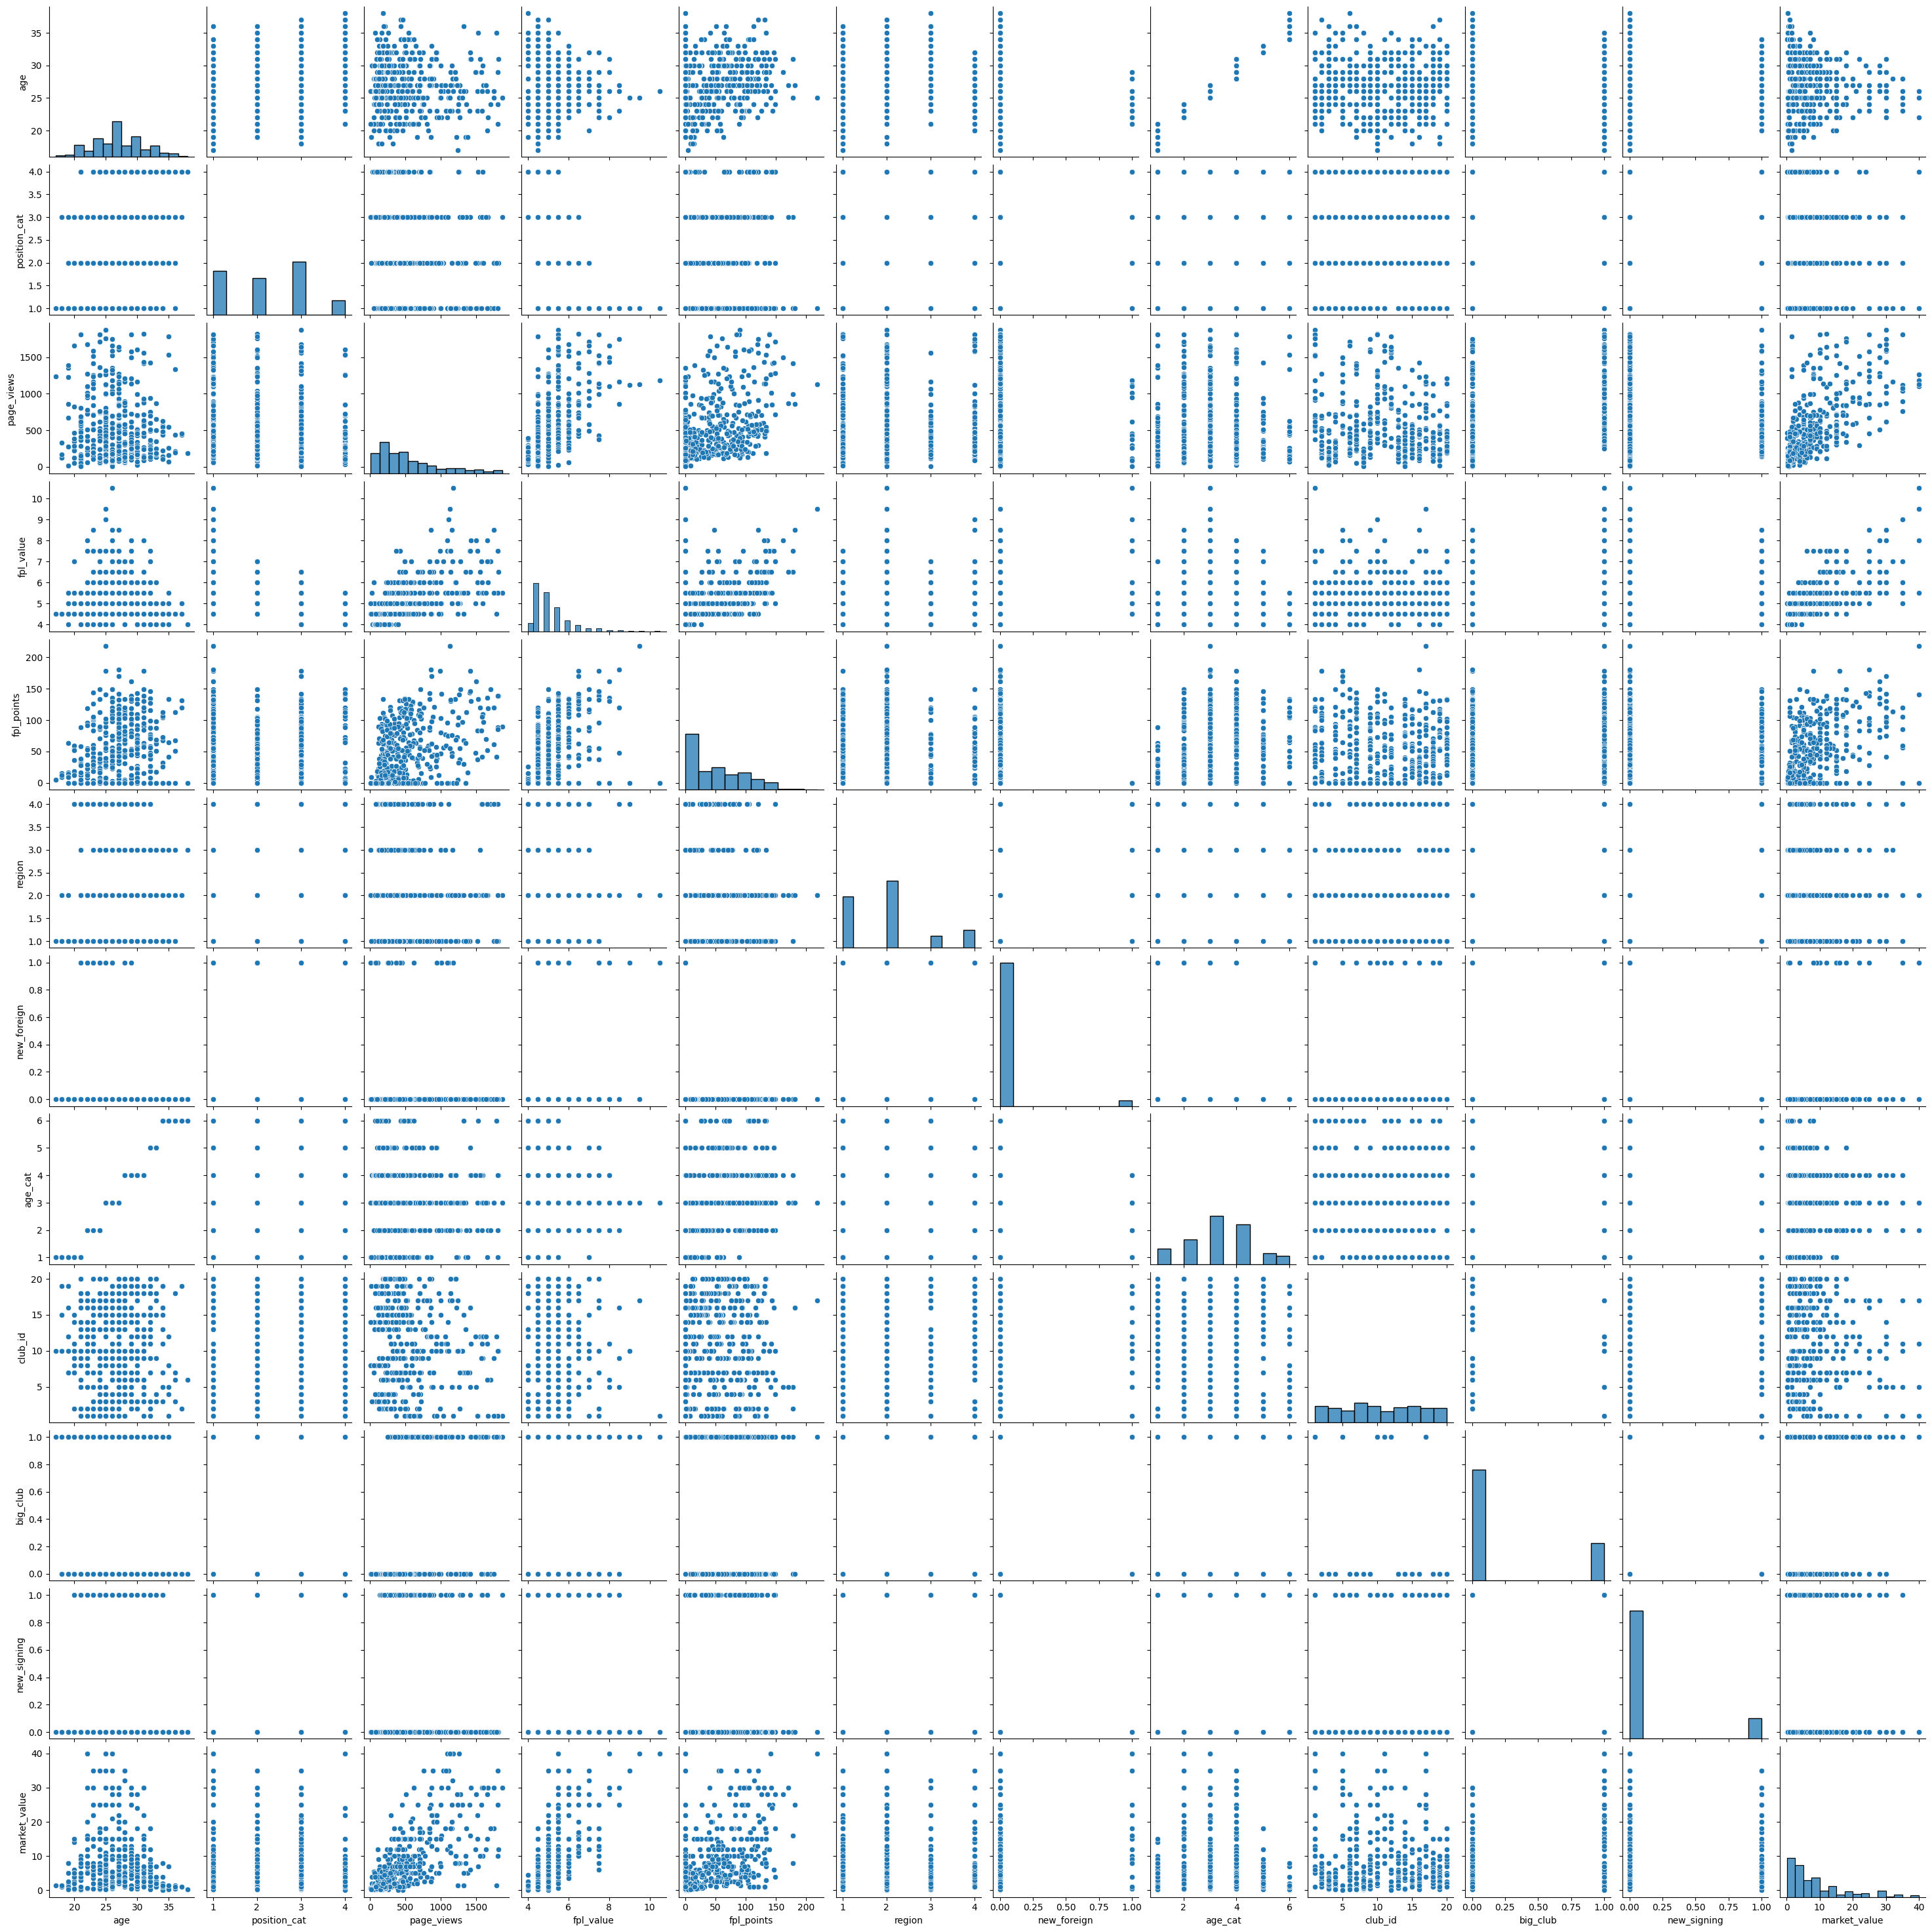

In [12]:
sns.pairplot(data=df,palette='viridis')
plt.show()

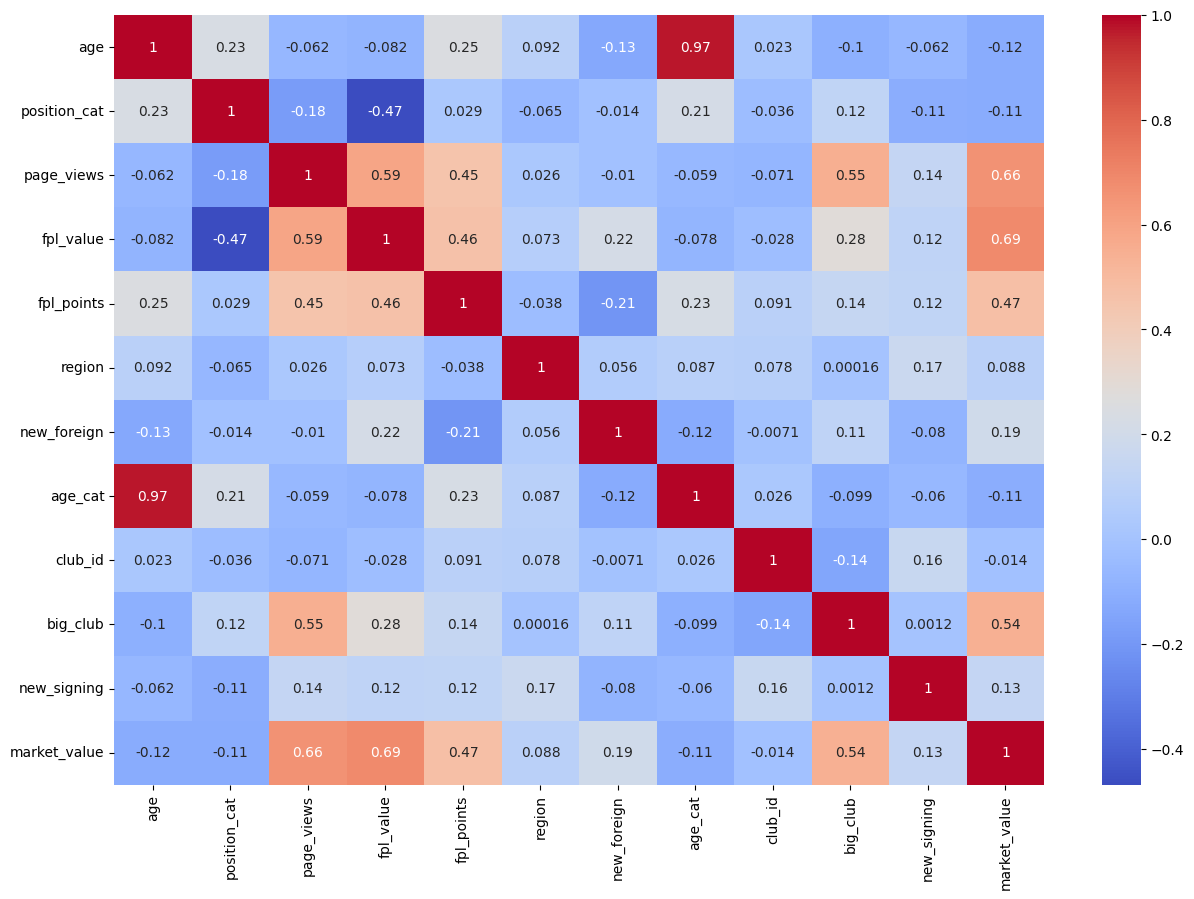

In [20]:
data = []

data = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15,10))
sns.heatmap(data=data.corr(), annot=True, cmap='coolwarm')
plt.show()

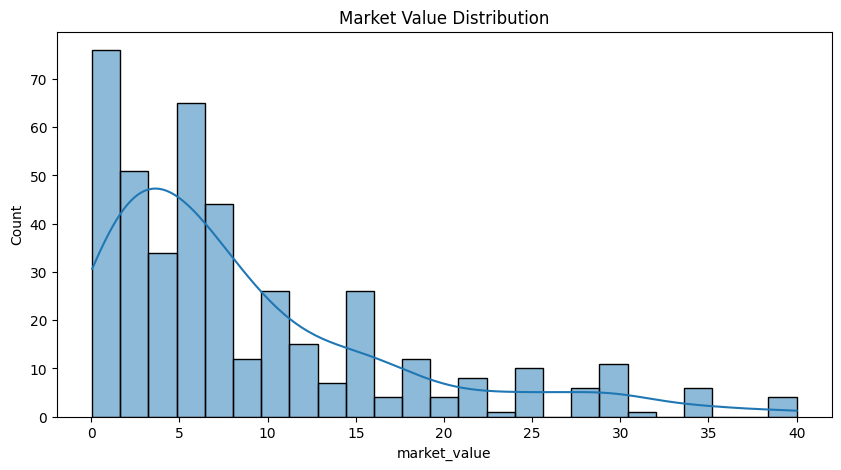

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df['market_value'], bins=25, kde=True)
plt.title("Market Value Distribution")
plt.show()

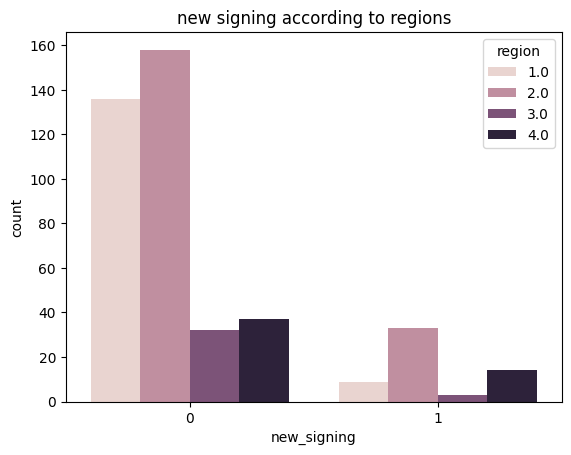

In [27]:
sns.countplot(data=df, x='new_signing', hue='region')
plt.title('new signing according to regions')
plt.show()